In [1]:
using Plots
using JLD2

In [142]:
data_mwms = load("data/surface_square_mwms_5_15_0.596_0.607_400_3_1023680.jld2")
Krange = 1 : length(collect(values(data_mwms["p_list"]))[1])
drange = data_mwms["drange"]
σrange = data_mwms["σrange"]
p_mwms_list = data_mwms["p_list"]

data_bsv = load("data/surface_square_bsv_3_23_0.596_0.607_1e7.jld2")
p_bsv_list = data_bsv["p_list"] ;

data_mwms_weight_time = load("data/surface_square_mwms_weights_times_5_15_0.606_0.606_400_3_480.jld2") 
σ_weight = collect(keys(data_mwms_weight_time["w_mwms_list"]))[1][1]

linewidth=2

2

# Fig a

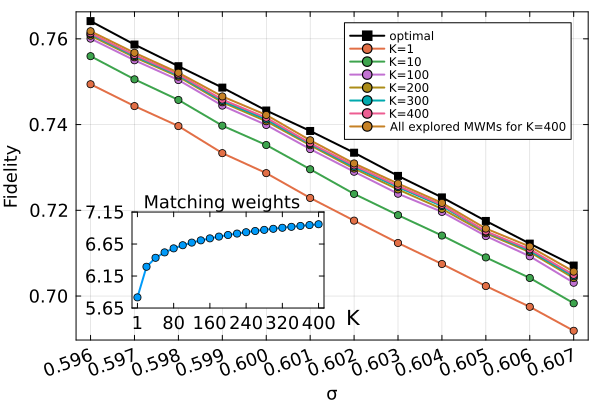

In [143]:
d = 13

f_bsv = [p_bsv_list[[σ, d]] for σ in σrange]
plot(σrange, f_bsv.^2, marker=:square, label="optimal", color=:black, linewidth=linewidth)

for k in [1, 10, 100, 200, 300, 400, 401]
    f_mwms = [p_mwms_list[[σ, d]][k] for σ in σrange]
    if k == 401
        label="All explored MWMs for K=400"
    else
        label="K=$k"
    end
    plot!(σrange, f_mwms.^2, marker=:circle, label=label, linewidth=linewidth)
end

plot!(xlabel="σ", 
    ylabel="Fidelity", 
    xticks=round.(σrange, digits=3),
    grid=true,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    xrotation = 20,
    frame=:box
)


plot!( 
    subplot = 2,
    inset = bbox(0.22, 0.53, 0.32, 0.24, :top, :left),
)

xticks = [1, collect(20:20:400)...]
for dd in [d]
    weights = data_mwms_weight_time["w_mwms_list"][[σ_weight, dd]]
    plot!(weights[xticks], marker=:circle, subplot=2, linewidth=linewidth)
end


yticks_subplots = [5.75, 6.25, 6.75, 7.25] .- 0.1
plot!(
    subplot=2,
    grid=false,
    tickfontsize=12,
    legend=false,
    xticks = (1:4:length(xticks), string.(xticks[1:4:end])),
    yticks = (yticks_subplots, collect(string.(yticks_subplots))),
    ylim = [yticks_subplots[1], yticks_subplots[end]],
    frame=:box
)
annotate!(0.602, 0.695, "K")
annotate!(0.599, 0.722, text("Matching weights", 12))


In [144]:
savefig("plots/fig_surf_sq_a.pdf");

In [145]:
f_bsv = [p_bsv_list[[σ, d]] for σ in σrange]
k = 401
f_mwms = [p_mwms_list[[σ, d]][k] for σ in σrange]

abs.(f_bsv.^2 - f_mwms.^2) ./ f_bsv.^2

12-element Vector{Float64}:
 0.003095385309806139
 0.002531715381497611
 0.0020264910242415897
 0.002748734723791655
 0.0013999681505138394
 0.002941107824244432
 0.0034107575771190625
 0.00245738265416538
 0.0017741228680651082
 0.0024803768099583095
 0.0009767882701430446
 0.002009358049170143

# Fig b

In [146]:
# σ = σrange[end]
# perc = 7/1000 

# Ks = [0 for _ in drange]
# decoding_inacc = []
# for (ind_d, d) in enumerate(drange)
#     decoding_inacc_2 = []
#     f_bsv = p_bsv_list[[σ, d]]^2
#     for k in Krange
#         f_mwm = p_mwms_list[[σ, d]][k]^2
#         decoding_inacc_3 = abs(f_mwm - f_bsv) / f_bsv * 100
        
#         push!(decoding_inacc_2, decoding_inacc_3)
#         if Ks[ind_d] == 0 && decoding_inacc_3 <= perc * 100
#             Ks[ind_d] = k
#         end
#     end
#     push!(decoding_inacc, decoding_inacc_2)
# end

# println(Ks)
# plot(drange, Ks, marker=:circle, linewidth=linewidth)



# plot!(xlabel="d", 
#     ylabel="K", 
#     xticks=drange,
#     legend=false,
#     grid=false,
#     tickfontsize=12,
#     labelfontsize=12,
#     legenfontsize=12,
#     frame=:box
# )

# plot!( 
#     subplot = 2,
#     inset = bbox(0.28, 0.08, 0.5, 0.5, :top, :left),
# )

# Krange2 = collect(20:38:400)
# pushfirst!(Krange2, 1)

# for (ind_d, d) in enumerate(drange)
#     plot!(Krange[Krange2], decoding_inacc[ind_d][Krange2], label="d=$d", marker=:square, subplot=2, linewidth=linewidth)
# end

# plot!(Krange, [perc * 100 for _ in Krange], subplot=2, linewidth=linewidth, color=:black, label="")

# plot!( 
#     subplot = 2,
#     grid = false,
#     # legend=false,
#     tickfontsize=12,    
#     labelfontsize=12,
#     legendfontsize=9,
#     ylabel="Decoding inaccuracy (%)",
#     xticks=[1,100,200,300,400],
#     xlabel="K",
#     frame=:box
# )


In [147]:
# savefig("plots/fig_surf_sq_b.pdf");

[3, 5, 10, 21, 56, 244]


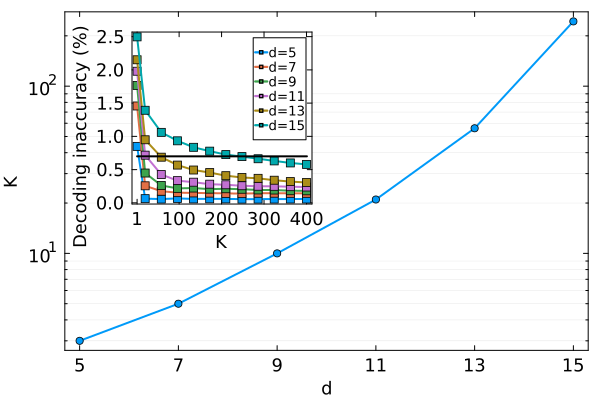

In [148]:
σ = σrange[end]
perc = 7/1000

Ks = [0 for _ in drange]
decoding_inacc = []
for (ind_d, d) in enumerate(drange)
    decoding_inacc_2 = []
    f_bsv = p_bsv_list[[σ, d]]^2
    for k in Krange
        f_mwm = p_mwms_list[[σ, d]][k]^2
        decoding_inacc_3 = abs(f_mwm - f_bsv) / f_bsv * 100
        
        push!(decoding_inacc_2, decoding_inacc_3)
        if Ks[ind_d] == 0 && decoding_inacc_3 <= perc * 100
            Ks[ind_d] = k
        end
    end
    push!(decoding_inacc, decoding_inacc_2)
end

println(Ks)
plot(drange, Ks, marker=:circle, linewidth=linewidth)



plot!(xlabel="d", 
    ylabel="K", 
    xticks=drange,
    legend=false,
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    frame=:box,
    yaxis=:log,
    yminorgrid = true,
)

plot!( 
    subplot = 2,
    inset = bbox(0.22, 0.08, 0.3, 0.43, :top, :left),
)

Krange2 = collect(20:38:400)
pushfirst!(Krange2, 1)

for (ind_d, d) in enumerate(drange)
    plot!(Krange[Krange2], decoding_inacc[ind_d][Krange2], label="d=$d", marker=:square, subplot=2, linewidth=linewidth)
end

plot!(Krange, [perc * 100 for _ in Krange], subplot=2, linewidth=linewidth, color=:black, label="")

plot!( 
    subplot = 2,
    grid = false,
    # legend=false,
    tickfontsize=12,
    labelfontsize=12,
    legendfontsize=9,
    # ylabel="Decoding inaccuracy (%)",
    xticks=[1,100,200,300,400],
    xlabel="K",
    frame=:box
)
annotate!(5,50, text("Decoding inaccuracy (%)", 12, rotation=90))


In [149]:
savefig("plots/fig_surf_sq_b_v2.pdf");

In [102]:
decoding_inacc

6-element Vector{Any}:
 Any[0.8493683225574682, 0.8076178963648789, 0.36974822240555283, 0.2291301185462496, 0.10785995574666431, 0.06479596370946432, 0.054838988883012044, 0.034228790838120804, 0.000645827347501299, 0.0137155060198954  …  0.05773246578268067, 0.057500772223297296, 0.057269078932190555, 0.057500772223297296, 0.05703738590932925, 0.057500772223297296, 0.05773246578268067, 0.05773246578268067, 0.057500772223297296, 0.05796415961029385]
 Any[1.4570858189953528, 1.4071241374610772, 0.8296917194204321, 0.7825742290534728, 0.5935299321696528, 0.5565320139273453, 0.49755235361143696, 0.447116662736223, 0.39227070227718114, 0.35893919796652946  …  0.1409898051348425, 0.14075806382578587, 0.1412215461750097, 0.1414532869462562, 0.1416850274486133, 0.14492936624717623, 0.14492936624717623, 0.1423802473422699, 0.14353894178707577, 0.14585631050926204]
 Any[1.7660874371603033, 1.674499307308977, 1.2634391992675764, 1.1556938545037179, 0.9677488719322468, 0.8995920626567513, 0.8041

# Fig c

In [151]:
# ts = []
# for (K, d) in zip(Ks, drange)
#     ts2 = data_mwms_weight_time["t_mwms_list"][[σ_weight, d]][1:K]
#     t = sum(ts2) + data_mwms_weight_time["t_pre_list"][[σ_weight, d]] + data_mwms_weight_time["t_post_list"][[σ_weight, d]]
#     push!(ts, t)
# end

# plot(drange[2:end], ts[2:end], marker=:circle, linewidth=linewidth)

# plot!(xlabel="d", 
#     ylabel="Runtime (seconds)", 
#     xticks=drange,
#     legend=false,
#     grid=false,
#     tickfontsize=12,
#     labelfontsize=12,
#     legenfontsize=12,
#     frame=:box
# )

# plot!( 
#     subplot = 2,
#     inset = bbox(0.21, 0.05, 0.43, 0.49, :top, :left),
# )

# linecolors = get_color_palette(:auto, plot_color(:white))

# xticks = [1, 100, 200, 300, 400]
# for (ind_d, (d, K2)) in enumerate(zip(data_mwms_weight_time["drange"][2:end], Ks[2:end]))
#     ts = data_mwms_weight_time["t_mwms_list"][[σ_weight, d]]
#     ts = cumsum(ts) .+ data_mwms_weight_time["t_pre_list"][[σ_weight, d]] .+ data_mwms_weight_time["t_post_list"][[σ_weight, d]]
#     println(ts[xticks])
#     plot!(xticks, ts[xticks], marker=:square, label="d=$d", subplot=2, linewidth=linewidth, color=linecolors[ind_d])
    
#     plot!([K2], [ts[K2]], seriestype=:scatter, color=linecolors[ind_d], marker=:star, subplot=2, label="")
# end


# plot!(
#     subplot=2,
#     xlabel="K", 
#     ylabel="Runtime (seconds)", 
#     grid=false,
#     tickfontsize=12,
#     labelfontsize=12,
#     legendfontsize=9,
#     # xticks = (1:length(xticks), string.(xticks)),
#     xticks=xticks,
#     # legend=false
#     frame=:box
# )


In [152]:
# savefig("plots/fig_surf_sq_c.pdf");

[3.0722834676958333, 4.05680469845625, 5.111648728016666, 6.161706108364584, 7.2577440624000005]
[5.168628082064584, 7.183890911585417, 9.259199686195833, 11.319522135027084, 13.29558580290625]
[11.411469320422919, 14.767790843718752, 18.11466809964375, 21.44106244936667, 24.792561382708335]
[26.68854400351666, 32.356289534537495, 38.00067795654583, 43.55339877103749, 49.00537731086458]
[40.82224650806458, 49.201715350889586, 57.29903467760208, 65.27116575961043, 73.15154404618958]


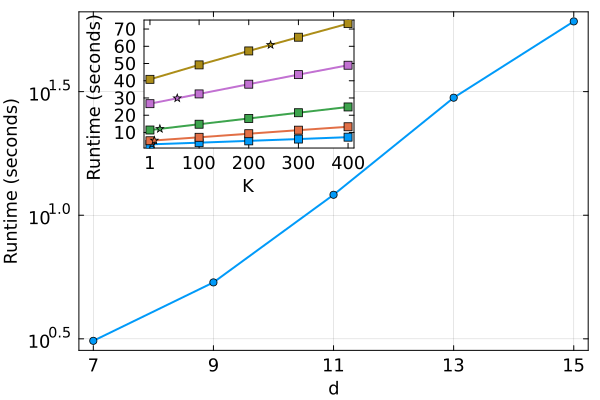

In [153]:
ts = []
for (K, d) in zip(Ks, drange)
    ts2 = data_mwms_weight_time["t_mwms_list"][[σ_weight, d]][1:K]
    t = sum(ts2) + data_mwms_weight_time["t_pre_list"][[σ_weight, d]] + data_mwms_weight_time["t_post_list"][[σ_weight, d]]
    push!(ts, t)
end

plot(drange[2:end], ts[2:end], marker=:circle, linewidth=linewidth)

plot!(xlabel="d", 
    ylabel="Runtime (seconds)", 
    xticks=drange,
    legend=false,
    # grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    frame=:box,
    yaxis=:log,
    yminorgrid = true,
)

annotate!(7,30, text("Runtime (seconds)", 12, rotation=90))


plot!( 
    subplot = 2,
    inset = bbox(0.24, 0.05, 0.35, 0.32, :top, :left),
)

linecolors = get_color_palette(:auto, plot_color(:white))

xticks = [1, 100, 200, 300, 400]
for (ind_d, (d, K2)) in enumerate(zip(data_mwms_weight_time["drange"][2:end], Ks[2:end]))
    ts = data_mwms_weight_time["t_mwms_list"][[σ_weight, d]]
    ts = cumsum(ts) .+ data_mwms_weight_time["t_pre_list"][[σ_weight, d]] .+ data_mwms_weight_time["t_post_list"][[σ_weight, d]]
    println(ts[xticks])
    plot!(xticks, ts[xticks], marker=:square, label="d=$d", subplot=2, linewidth=linewidth, color=linecolors[ind_d])
    
    plot!([K2], [ts[K2]], seriestype=:scatter, color=linecolors[ind_d], marker=:star, subplot=2, label="")
end


plot!(
    subplot=2,
    xlabel="K", 
    # ylabel="Runtime (seconds)", 
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legendfontsize=9,
    # xticks = (1:length(xticks), string.(xticks)),
    xticks=xticks,
    legend=false,
    frame=:box
)

In [154]:
savefig("plots/fig_surf_sq_c_v2.pdf");

# Fig d

40 [86.6027192406517, 81.97882749457676, 74.35196231791753, 65.43584977894096, 53.54901830742674]
30 [86.26882099379274, 79.1053445932324, 71.46132383905493, 61.72553830989369, 50.022644664262316]
20 [82.40573322907409, 74.60633710946574, 63.76481452396688, 55.92109135859715, 44.22282010397559]
10 [75.36595351576376, 62.18109741384229, 52.45301599244998, 42.155553025820936, 32.525138798985154]


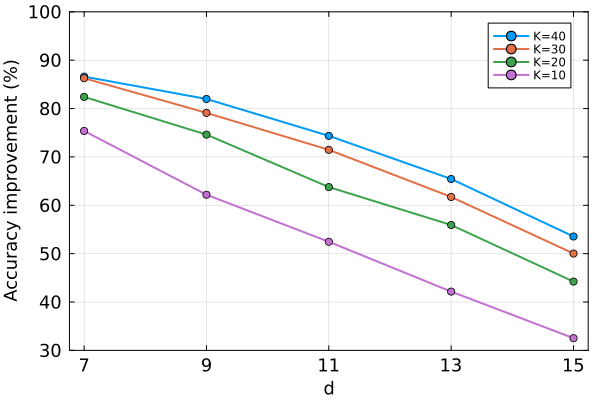

In [155]:
σ = σrange[end]
drange = data_mwms["drange"]
drange = drange[2:end] # exclude d = 5

plot()
Krange = [40, 30, 20, 10]
improvements = nothing
for K in Krange
    improvements = []
    for d in drange
        f_bsv = [p_bsv_list[[σ, d]] for σ in σrange]
        f_mwms_1 = [p_mwms_list[[σ, d]][1] for σ in σrange]
        f_mwms = [p_mwms_list[[σ, d]][K] for σ in σrange]
        push!(improvements, (f_mwms.^2 - f_mwms_1.^2) ./ abs.(f_bsv.^2 - f_mwms_1.^2))
    end

    println(K, " ", [item[end] for item in improvements] .* 100)
    plot!(drange, [item[end] for item in improvements] .* 100, marker=:circle, label="K=$K", linewidth=linewidth)
end

plot!(xlabel="d", 
    ylabel="Accuracy improvement (%)", 
    xticks=drange,
    grid=true,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    ylim = [30, 100],
    # yaxis=:log
    frame=:box
)

In [156]:
savefig("plots/fig_surf_sq_d.pdf");

# Repeat Fig b with other $σ$ and decoding inaccuracy

[1, 3, 6, 9, 41, 66]


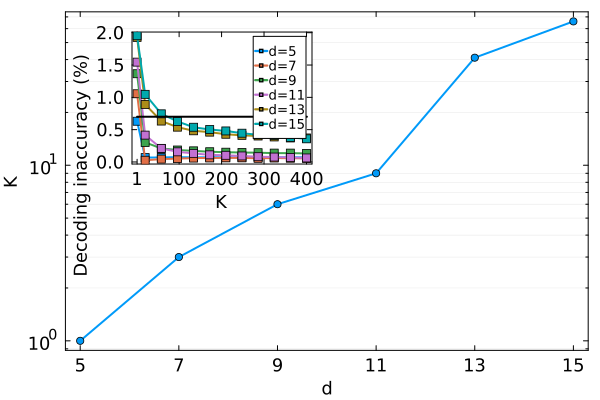

In [187]:
drange = data_mwms["drange"]
Krange = 1 : length(collect(values(data_mwms["p_list"]))[1])

σ = σrange[1]
perc = 7/1000

Ks = [0 for _ in drange]
decoding_inacc = []
for (ind_d, d) in enumerate(drange)
    decoding_inacc_2 = []
    f_bsv = p_bsv_list[[σ, d]]^2
    for k in Krange
        f_mwm = p_mwms_list[[σ, d]][k]^2
        decoding_inacc_3 = abs(f_mwm - f_bsv) / f_bsv * 100
        
        push!(decoding_inacc_2, decoding_inacc_3)
        if Ks[ind_d] == 0 && decoding_inacc_3 <= perc * 100
            Ks[ind_d] = k
        end
    end
    push!(decoding_inacc, decoding_inacc_2)
end

println(Ks)
plot(drange, Ks, marker=:circle, linewidth=linewidth)



plot!(xlabel="d", 
    ylabel="K", 
    xticks=drange,
    legend=false,
    grid=false,
    tickfontsize=12,
    labelfontsize=12,
    legenfontsize=12,
    frame=:box,
    yaxis=:log,
    yminorgrid = true,
)

plot!( 
    subplot = 2,
    inset = bbox(0.22, 0.08, 0.3, 0.33, :top, :left),
)

Krange2 = collect(20:38:400)
pushfirst!(Krange2, 1)

for (ind_d, d) in enumerate(drange)
    plot!(Krange[Krange2], decoding_inacc[ind_d][Krange2], label="d=$d", marker=:square, subplot=2, linewidth=linewidth)
end

plot!(Krange, [perc * 100 for _ in Krange], subplot=2, linewidth=linewidth, color=:black, label="")

plot!( 
    subplot = 2,
    grid = false,
    # legend=false,
    tickfontsize=12,
    labelfontsize=12,
    legendfontsize=9,
    # ylabel="Decoding inaccuracy (%)",
    xticks=[1,100,200,300,400],
    xlabel="K",
    frame=:box
)
annotate!(5,10, text("Decoding inaccuracy (%)", 12, rotation=90))


In [183]:
savefig("plots/fig_surf_sq_b_v3.pdf");